#### Copyright 2018 Google LLC.

In [18]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Linear Regression With scikit-learn

We have learned about linear regression in theory, now let's put our newly found skills into practice. In this Colab we will create multiple linear regression models using the scikit-learn toolkit.

## Overview

### Learning Objectives

* Create a closed-formed linear regression model
* Create a linear regression model using an optimizer

### Prerequisites

* Introduction to Colab
* Intermediate Python
* Introduction to Pandas
* Visualizations
* Introduction to scikit-learn

### Estimated Duration

60 minutes

### Grading Criteria

Each exercise is worth 3 points. The rubric for calculating those points is:

| Points | Description |
|--------|-------------|
| 0      | No attempt at exercise |
| 1      | Attempted exercise, but code does not run |
| 2      | Attempted exercise, code runs, but produces incorrect answer |
| 3      | Exercise completed successfully |

There is 1 exercises in this Colab so there are 3 points available. The grading scale will be 3 points.

# Creating a dataset

In this colab we will examine different methods of applying a linear regression to a data set. Calculating a linear regression can be done with a simple equation if the data is small enough. If the data is large, there are methods to calculate the regression using sampling and/or batching.

But before we get started, let's create some sample data to perform our regression on. The code below creates 1000 data points.

In [19]:
import numpy as np

# The size of the dataset that we'll be using to perform our linear regression.
DATA_SET_SIZE = 1000

# The maximum value of the x coordinate. The range of values of X will be
# (0, X_MAX).
X_MAX = 5

# The Y-intercept is one of the "secret" values that we'll be trying to predict
# via linear regression.
INTERCEPT = 4

# The slope is another value that we'll be trying to predict using linear
# regression.
SLOPE = 3

# Generate the x-coordinates for our dataset.
coffee = X_MAX * np.random.rand(DATA_SET_SIZE, 1)

# Generate the y-coordinates for our dataset using the linear equation
# y = mx + b.
energy = SLOPE * coffee + INTERCEPT

Let's take a look at the data set that was just generated.

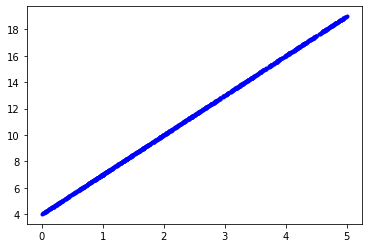

In [20]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(coffee, energy, 'b.')
plt.show()

The data does indeed have an x range from zero to our max x value. Notice that the y-intercept and slope match our seeded values.

This data looks nothing like we'd see in the real world though. It would be trivial to fit a line to the data as is. Let's add a little randomness to the data to make it more realistic.

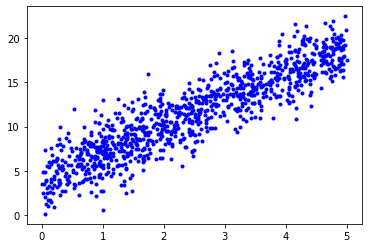

In [21]:
energy = energy + 2 * np.random.randn(DATA_SET_SIZE, 1)

plt.plot(coffee, energy, 'b.')
plt.show()

That's much better! There is still a linear trend to the data, but there is also much more noise.

# The Normal Equation

If the dataset being processed is small enough, then the Normal Equation can be used to calculate the slope and y-intercept of the regression line in-memory. The normal equation can easily be written in NumPy as seen below.

In [22]:
# x is a Nx1 matrix containing our x-values. The first step in calculating the
# Normal Equation is to create an Nx2 matrix where each "row" has the value 1
# and the x value.
coffee_ = np.c_[np.ones((DATA_SET_SIZE, 1)), coffee]

norm = np.linalg.inv(coffee_.T.dot(coffee_)).dot(coffee_.T).dot(energy)

calculated_intercept = norm[0][0]
calculated_slope = norm[1][0]

print("Calculated slope {} vs actual {}".format(calculated_slope, SLOPE))
print("Calculated intercept {} vs actual {}".format(calculated_intercept, INTERCEPT))

Calculated slope 2.969589106680708 vs actual 3
Calculated intercept 4.145924435747784 vs actual 4


Not bad! The random noise we added to the data prevented us from exactly predicting the slope and intercept, but our calculations were pretty close.

We can now use these values to make predictions.

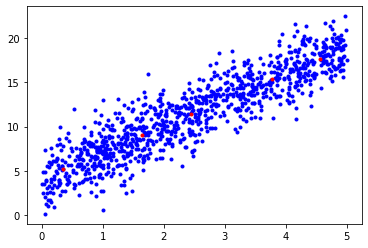

In [23]:
# Create a (5,1) matrix of containing values to make predictions on.
coffee_ = np.array([[0.34], [1.65], [2.45], [3.78], [4.56]])

# Convert the matrix to a (5, 2) matrix with 1s in the first column
# in order to perform a dot-product against the calculated slope and
# intercept.
coffee_predict = np.c_[np.ones((5, 1)), coffee_]

# Make the predictions
energy_predict = coffee_predict.dot(norm)

# Plot the original data as blue dots.
plt.plot(coffee, energy, 'b.')

# Plot the predictions as red dots.
plt.plot(coffee_, energy_predict, 'r.')
plt.show()

If we want to plot the calculated line we can ask for the prediction at the min and max values for x and plot the line.

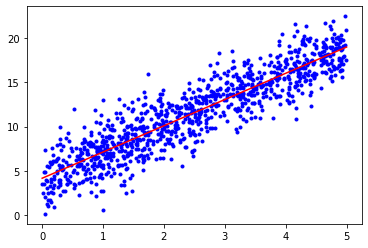

In [24]:
coffee_ = np.array([[0.0], [X_MAX]])
coffee_predict = np.c_[np.ones((2,1)), coffee_]
energy_predict = coffee_predict.dot(norm)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r-')
plt.show()

# Challenge: Optimized Normal Equation

It turns out that the math operations used to calculate the Normal Equation are quite expensive. We'll explore other methods of performing a linear regression soon, but there is a purely mathematical optimization that has been discovered. The equation uses the pseudoinverse of the input matrix to predict y.

> $\hat{\theta} = X^+y$

Find the NumPy function that calculates the pseudoinverse of a matrix and then use that function to write a more optimal method for finding the slope and intercept for a linear regression in memory.

In [25]:
coffee_ = np.c_[np.ones((DATA_SET_SIZE, 1)), coffee]

norm2 = np.linalg.pinv(coffee_.T.dot(coffee_)).dot(coffee_.T).dot(energy) 
# Update this line to perform an in-memory calculation of a
                   # linear regression using the optimized equation in the place
                   # of the [[0], [0]] matrix.

calculated_intercept2 = norm2[0][0] 
calculated_slope2 = norm2[1][0]

EPSILON = 0.00001
if abs(calculated_slope - calculated_slope2) < EPSILON and abs(calculated_intercept - calculated_intercept2) < EPSILON:
  print("You win!")
else:
  print("Try again :(")

You win!


# Linear Regression in SciKit Learn

Using NumPy to calculate the slope and intercept for a linear regression isn't difficult, but it can be error-prone. Luckily you won't have to perform these calculations directly in most cases. SciKit Learn performs the optimized in-memory calculations that we just created above in its LinearRegression implementation.

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(coffee, energy)
lin_reg.coef_, lin_reg.intercept_

(array([[2.96958911]]), array([4.14592444]))

Notice that the slope (SciKit Learn calls this coef_) and intercept are the same values that we calculated above manually.

We can use this slope and intercept to predict y values given x values.

In [27]:
coffee_ = np.array([[0.34], [1.65], [2.45], [3.78], [4.56]])

energy_predict = lin_reg.predict(coffee_)
energy_predict

array([[ 5.15558473],
       [ 9.04574646],
       [11.42141775],
       [15.37097126],
       [17.68725076]])

Plotting these values we see they are the same that were predicted by our manual process.

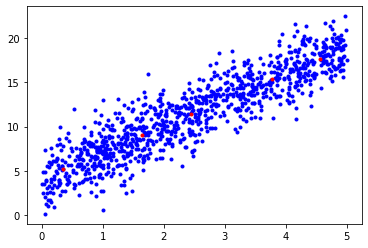

In [28]:
plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r.')
plt.show()

And we can calculate two points and use those to draw the regression line.

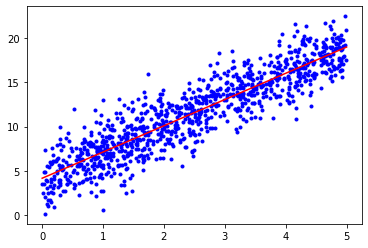

In [29]:
coffee_ = np.array([[0.0], [5.0]])
energy_predict = lin_reg.predict(coffee_)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r-')
plt.show()

# Stochastic Gradient Descent

It is not always practical to compute the linear regression using the entire training data set. For cases where training using the entire set is impractical the stochastic gradient descent method can be used. In SciKit Learn this is as simple as using the SGDRegressor.

In [30]:
from sklearn.linear_model import SGDRegressor

# Create a new Stochastic Gradient Descent regressor
sgd_reg = SGDRegressor()

# Fit the model
sgd_reg.fit(coffee, energy.ravel())

# Display the slope and intercept
sgd_reg.coef_, sgd_reg.intercept_

(array([2.96900976]), array([4.1024003]))

You might notice that the slope and intercept aren't nearly as accurate as what we were getting when processing the entire dataset. This is because the SGDRegressor is only using a subset of the training data.

Let's take a look at the regression line calculated by the full linear regressor and the SGD one.

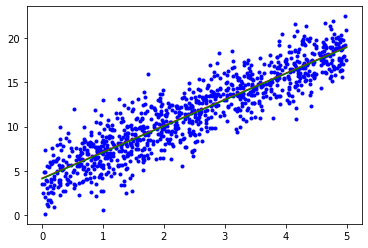

In [31]:
coffee_ = np.array([[0.0], [5.0]])

lin_predict = lin_reg.predict(coffee_)
sgd_predict = sgd_reg.predict(coffee_)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, lin_predict, 'r-')
plt.plot(coffee_, sgd_predict, 'g-')
plt.show()

# Challenge: Regressor Parameters

The SGDRegressor has many parameters that can be tuned. Out-of-the-box, our regressor didn't do that well. Let's see if we can tune some of the parameters of the regressor to get its predicted values for the slope and intercept closer to those we predicted using the entire data set.

Check out the [SGDRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) and look over the parameters available. Pay special attention to parameters related to learning rate and iterations over the data. See if you can tweak the parameters to get with epsilon of our calculated values below. Think about why your changes worked.

In [32]:
sgd_reg = SGDRegressor(learning_rate ='adaptive', n_iter_no_change=10) # Update the parameters to SGDRegressor

# Fit the model
sgd_reg.fit(coffee, energy.ravel())

EPSILON = 0.05
if abs(calculated_slope - sgd_reg.coef_) < EPSILON and abs(calculated_intercept - sgd_reg.intercept_) < EPSILON:
  print("You win!")
else:
  print("Try again :(")

You win!


# Challenge: Mini Batching

So far in this colab every method that we have used relied on the entire dataset being in memory at one time. For "big data" problems, this won't always be possible.

In the code below we have broken our data set up into small batches. In practice these batches might be loaded into memory one at a time. Each batch is fed to the SGDRegressor using the `partial_fit` method. This allows us to train the model in chunks.

Your challenge is to mini-batch train the model within the desired epsilon of our calculated slope and intercept. You'll find hints in the [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) documentation by searching for `partial_fit`. Pay attention to parameters that don't apply to `partial_fit`.

In [33]:
BATCH_SIZE = 50

sgd_reg = SGDRegressor()

for n in range(15):
  for i in range(0, DATA_SET_SIZE, BATCH_SIZE):
    sgd_reg.partial_fit(coffee[i:i+BATCH_SIZE], energy[i:i+BATCH_SIZE].ravel())

print("Intercept: {}, Coef: {}".format(sgd_reg.intercept_, sgd_reg.coef_))

EPSILON = 0.05
if abs(calculated_slope - sgd_reg.coef_) < EPSILON and abs(calculated_intercept - sgd_reg.intercept_) < EPSILON:
  print("You win!")
else:
  print("Try again :(")

Intercept: [4.09698973], Coef: [2.99963704]
You win!


# Exercises

For these exercises we will download a CSV of life expectancies from [GapMinder](https://www.gapminder.org/data/) and create a liner regression for life expectancy in the United States.

## Exercise 1: Obtain the data

Download a CSV of life expectancy data from [GapMinder](https://www.gapminder.org/data/), upload it to this Colab, and read the data into memory using Pandas.

Examine the data using describe.

### Student Solution

In [35]:
# Your code goes here
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

dataset_filename = "./life_expectancy_years.csv"
life_expectancy_years=pd.read_csv(dataset_filename)


In [36]:
life_expectancy_years.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,184.000000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,70.001070,70.225668,70.659358,71.05615,71.399465,71.622995,71.933690,72.206952,72.422283,72.658152
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,8.832102,9.050710,8.439841,8.18101,7.996165,7.889169,7.605557,7.414169,7.331040,7.252807
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,45.400000,32.100000,47.500000,47.90000,48.000000,48.400000,49.600000,50.300000,50.800000,51.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,63.400000,63.900000,64.300000,65.00000,65.350000,65.550000,66.050000,66.650000,66.900000,67.100000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,72.500000,72.600000,72.700000,72.80000,72.900000,73.000000,73.300000,73.500000,73.700000,74.050000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,76.600000,76.700000,76.900000,77.00000,77.200000,77.350000,77.500000,77.650000,77.825000,78.025000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,82.700000,82.800000,82.900000,83.20000,83.400000,83.600000,83.800000,83.900000,84.000000,84.200000


## Exercise 2: Look at the data

Examine the data using head and/or tail.

### Student Solution

In [37]:
# Your code goes here
life_expectancy_years.head()


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [38]:
life_expectancy_years.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
182,Venezuela,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,...,75.0,75.4,75.4,75.3,75.4,75.5,75.5,75.5,75.7,75.9
183,Vietnam,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,72.8,73.1,73.3,73.6,73.8,74.1,74.3,74.5,74.7,74.9
184,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,67.0,67.5,67.7,67.9,68.4,68.4,67.2,66.7,66.9,67.1
185,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,50.7,52.0,53.2,54.5,55.7,57.0,58.1,58.8,59.1,59.5
186,Zimbabwe,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,...,47.5,49.6,51.9,54.1,55.6,57.0,58.3,59.3,59.8,60.2


## Exercise 3: Prep Life Expectancy

Extract the life expectancy values for the United States into a NumPy array. 

To do this you'll need to find the row that contains data for the United States. When you find that row of data you'll find the word 'United States' in the first column and then floating point numbers in subsequent columns. The goal of this step is to create a NumPy array containing those numbers.

### Student Solution

In [39]:
# Your code goes here
United_States = np.asarray(life_expectancy_years.loc[life_expectancy_years['country'] =='United States'].loc[:,'1800':]).ravel()
United_States

array([39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 38. , 34.5, 34. , 31. , 38. ,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 40. , 40.6, 41.1, 41.7, 42.3, 42.9, 43.5,
       44. , 44.6, 45.2, 45.6, 45.9, 46.3, 46.7, 47.1, 47.4, 47.8, 48.2,
       48.5, 48.9, 49.3, 50.5, 50.6, 49.6, 50.3, 50.1, 50.2, 51.9, 52.8,
       51.8, 53.4, 54.1, 53.5, 54.6, 55.1, 54.2, 54. , 47.2, 55.3, 55.4,
       58.2, 58.1, 57.5, 58.5, 58.5, 57.9, 59.4, 58.3, 58.5, 59.6, 60.3,
       61. , 60.9, 60.3, 60.9, 60.4, 61.1, 62.4, 63.1, 63.2, 63.8, 64.6,
       64.3, 65.1, 65.6, 66.3, 66.7, 67.3, 67.6, 68

## Exercise 4: Create year data

We need to now create an array of year data from the min to the max year in the dataset. There are a couple of ways that this can be done.

The column names (except column 0) are the years. You can extract those years into an array similarly to what you did for life expectancy. Note that the columns names are strings so you'll want to convert those names into integers.

If no years are missing from the data set you can also just use a range function to generate numbers between the min and max years.

### Student Solution

In [40]:
# Your code goes here
year_data = np.array(life_expectancy_years.columns[1:].astype(int))
year_data

array([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810,
       1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832,
       1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843,
       1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854,
       1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865,
       1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
       1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 19

## Exercise 5: Plot the data

Create a scatterplot of the data.

### Student Solution

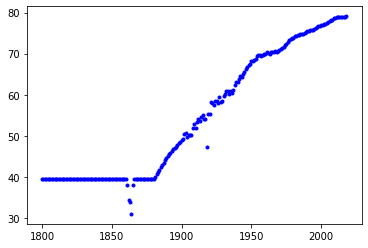

In [41]:
# Your code goes here
plt.plot(year_data, United_States, 'b.')
plt.show()

## Exercise 6: Divide the data

Split off 20% of the data as a test set and keep the rest for training data.

To do this, it will be useful to create a `DataFrame` and store the years and life expectancy arrays created above as columns in that data frame.

You can then randomize and split the data frame or use ScikitLearn's built in test/train data splitter.

### Student Solution

In [42]:
# Your code goes here
from sklearn.model_selection import train_test_split

data = pd.DataFrame({'year_data':year_data, 'United_States':United_States})
xTrain, xTest, yTrain, yTest = train_test_split(data['year_data'], data['United_States'], test_size = 0.2, random_state = 0)

## Exercise 7: Create and train a model

Use LinearRegression to create a model.

### Student Solution

In [43]:
from sklearn.linear_model import LinearRegression

xTrain = np.array(xTrain).reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(xTrain.reshape(-1,1), yTrain.ravel())
lin_reg.coef_, lin_reg.intercept_

(array([0.2290769]), -382.5141375571503)

## Exercise 8: Test your model

Use the test data you retained to make predictions of life expectancy based on year. Compare the predictions to the actual data. Use ScikitLearn to calculate root mean squared error.

### Student Solution

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#rmse for test data
year_ = np.array(xTest).reshape(-1, 1)
life_predict = lin_reg.predict(year_)
rmse = sqrt(mean_squared_error(yTest, life_predict))
rmse

4.987961454211089

In [45]:
#rmse for full data
year_ = np.array(year_data).reshape(-1, 1)
life_predict = lin_reg.predict(year_)
rmse = sqrt(mean_squared_error(United_States, life_predict))
rmse

4.3090313218593455

## Exercise 9: Plot your regression

Create a scatter plot of the full set of life expectancy data. Draw your regression line over the scatterplot.

### Student Solution

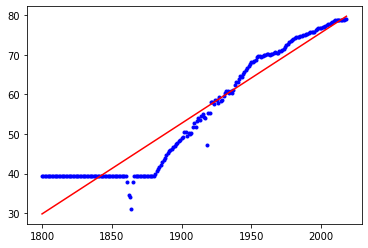

In [46]:
# Your code goes here
# year_ = np.array(year_data).reshape(-1, 1)
year_ = np.array([[1800.0],[2018.0]])
life_predict = lin_reg.predict(year_)

plt.plot(year_data, United_States, 'b.')
plt.plot(year_, life_predict, 'r-')
plt.show()

## Exercise 10: Challenge (Ungraded)

The [CalCOFI](https://www.kaggle.com/sohier/calcofi/version/2) dataset contains decades of oceanic data. In this exercise we will use this data to attempt to predict water temperature based on salinity. The exercise is divided into multiple steps, each with a code block after it for your solution.

**Acquire the data**

The [CalCOFI](https://www.kaggle.com/sohier/calcofi/version/2) data consists of two files, one containing data about "Casts" and the other about "Bottles". Look at the data files and try to get an understanding of what a cast is and what a bottle is.

Find the file that contains temperature and salinity information, download that file, and then upload it to Colab. You'll want to use the zipped version of the file so that the upload doesn't take too long.

Once the file is uploaded, write some Python code to unzip the file.

In [48]:
dataset_filename = "./bottle.csv"
bottle=pd.read_csv(dataset_filename,low_memory=False)

**Load the data using Pandas**

Now that you have an unzipped version of the file you can load the data into memory using Pandas. Write code to read the file into memory and describe the data table that was created.

**Drop rows with missing data**

Looking at the counts for temperature and salinity you can see that there are some rows with missing data. Remove the rows with missing temperature or salinity data from the data frame. After you are done, describe the data to make sure that every temperature and salinity row has data.

In [49]:
bottle = bottle[['T_degC','Salnty']]
n = len(bottle)
print("Temperature: "+ str(n-bottle['T_degC'].isnull().value_counts().values.tolist()[0]))
print("Salinity: "+ str(n-bottle['Salnty'].isnull().value_counts().values.tolist()[0]))

Temperature: 10963
Salinity: 47354


In [50]:
bottle=bottle.dropna(axis=0)
print("Temperature: "+ str(n-bottle['T_degC'].isnull().value_counts().values.tolist()[0]))
print("Salinity: "+ str(n-bottle['Salnty'].isnull().value_counts().values.tolist()[0]))

Temperature: 50616
Salinity: 50616


**Plot the data**

Create a scatterplot of salinity and temperature.

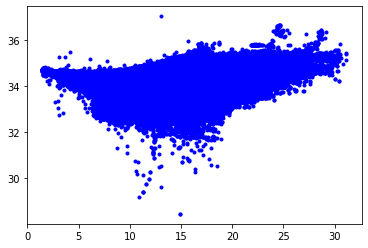

In [51]:
plt.plot(bottle['T_degC'],bottle['Salnty'],'b.')

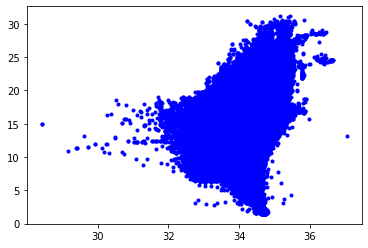

In [52]:
plt.plot(bottle['Salnty'],bottle['T_degC'],'b.')

**Shuffle the data**

In this exercise we will split the data into a training and test set. Since the data is ordered we will shuffle the data frame before splitting it. Write code to shuffle the data frame and look at the data (using head, tail, or some other means) to make sure that it is shuffled.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
data = pd.DataFrame({'Temp':bottle['T_degC'], 'Salinity':bottle['Salnty']})
data = shuffle(data)
data.head()


,Temp,Salinity
8177,5.510,34.2060
378245,5.300,34.2150
524160,9.890,33.4500
98001,9.570,34.5200
852460,8.617,33.8851


**Split the data frame**

For this exercise we'll split the data frame so that 20% of the data is held out for testing and the remaining data is used for training. Write code below to split the data into two data frames, one for testing and one for training.

In [54]:
xTrain, xTest, yTrain, yTest = train_test_split(data['Temp'], data['Salinity'], test_size = 0.2)

In [55]:
xTrain, xTest, yTrain, yTest = train_test_split( data['Salinity'], data['Temp'],test_size = 0.2)

**Create a linear regression model**

Use ScikitLearn's LinearRegression to fit a linear regression model to your training data.

In [56]:
from sklearn.linear_model import LinearRegression

xTrain = np.array(xTrain).reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(xTrain.reshape(-1,1), yTrain.ravel())
lin_reg.coef_, lin_reg.intercept_

(array([-4.62542862]), 167.3885890303242)

**Test your model**

Use your test data to make predictions and then find the mean squared error of those predictions vs. the actual measured temperatures for the test data.

ScikitLearn has support for calculating mean squared error.

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#rmse for test data
year_ = np.array(xTest).reshape(-1, 1)
life_predict = lin_reg.predict(year_)
mse = mean_squared_error(yTest, life_predict)
mse

13.322965394971654

**Plot your regression line**

Create another plot that contains the scatterplot of the salinity and temperatures. Draw the prediction line over the scatterplot.

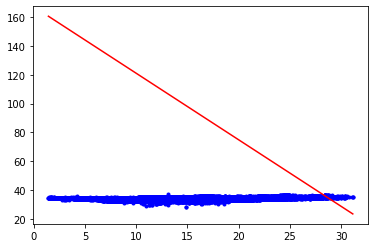

In [58]:
temp_ = np.array([[bottle['T_degC'].min()],[bottle['T_degC'].max()]])
san_predict = lin_reg.predict(temp_)

plt.plot(bottle['T_degC'],bottle['Salnty'],'b.')
plt.plot(temp_, san_predict, 'r-')
plt.show()


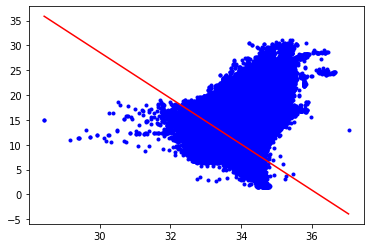

In [59]:
temp_ = np.array([[bottle['Salnty'].min()],[bottle['Salnty'].max()]])
san_predict = lin_reg.predict(temp_)

plt.plot(bottle['Salnty'],bottle['T_degC'],'b.')
plt.plot(temp_, san_predict, 'r-')
plt.show()